<a href="https://colab.research.google.com/github/AVJdataminer/COVID19_GC/blob/master/COVID19_GuidedCapstoneStep3_AnswerKey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guided Capstone Step 3 Exploratory Data Analysis - Answer Key

This is the third step in the Data Science Method. We introduced this topic in the last subunit. With Data Wrangling out of the way we can progress to the Exploratory Data Analysis section. In this exercise, you will learn to build data profiles and plots, including relationship plot and data correlation plot. Let's get started! 


  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Feature Engineering

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='DarkBlue'> Start by loading the necessary packages as we did in steps 1 & 2 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import json
%matplotlib inline
import plotly.graph_objects as go 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**<font color='DarkBlue'> If you need to change your path refer back to the notebook on steps 1 & 2 on how to do that. Then load the csv file you created in step 2, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [129]:
file='https://raw.githubusercontent.com/AVJdataminer/COVID19_GC/master/%20data/step2_output.csv'
df=pd.read_csv(file)
df.head()

,confirmed,deaths,timestamp,province_state,long,country_region,timestamp.date,lat,recovered
0,29.0,0.0,1585483200,missing,28.2833,Zambia,2020-03-29,-15.4167,0.0
1,609.0,40.0,1585483200,missing,30.0000,Egypt,2020-03-29,26.0000,132.0
2,2139.0,7.0,1585483200,missing,-71.5430,Chile,2020-03-29,-35.6751,75.0
3,156.0,0.0,1585483200,Saskatchewan,-106.4509,Canada,2020-03-29,52.9399,0.0
4,2840.0,22.0,1585483200,Quebec,-73.5491,Canada,2020-03-29,52.9399,0.0


# Build data profile tables and plots 

**<font color='DarkBlue'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
confirmed,15825.0,5.389826e+02,4.888479e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,1.408860e+05
deaths,15825.0,2.119368e+01,2.704851e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.077900e+04
timestamp,15825.0,1.582531e+09,1.669441e+06,1.579694e+09,1.581077e+09,1.582546e+09,1.583928e+09,1.585483e+09
long,15825.0,6.239586e+01,3.422764e+03,-7.515200e+04,-1.445240e+01,2.175870e+01,9.000000e+01,1.491240e+05
lat,15825.0,9.131888e+01,1.706728e+03,-2.816700e+04,7.540000e+00,2.497400e+01,4.160860e+01,4.819600e+04
recovered,15825.0,1.504047e+02,2.178329e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.257000e+04


If we sum the daily confirmed, recovered, and deaths then we can plot them over time.**<font color='DarkBlue'> Using the groupby function along with aggregate create a new dataframe with the sum values of 'confirmed', 'deaths',and 'recovered', by date.</font>**

In [18]:
ds = df.groupby(['timestamp.date']).agg({'confirmed':'sum','deaths':'sum', 'recovered':'sum'}).reset_index()
ds.head()

,timestamp.date,confirmed,deaths,recovered
0,2020-01-22,555.0,17.0,28.0
1,2020-01-23,654.0,18.0,30.0
2,2020-01-24,941.0,26.0,36.0
3,2020-01-25,1434.0,42.0,39.0
4,2020-01-26,2118.0,56.0,52.0


In [56]:
ds.tail(10)

,timestamp.date,confirmed,deaths,recovered
57,2020-03-19,242706.0,9867.0,84774.0
58,2020-03-20,271910.0,11297.0,86926.0
59,2020-03-21,304519.0,12973.0,91419.0
60,2020-03-22,335834.0,14644.0,94192.0
61,2020-03-23,378547.0,16505.0,95882.0
62,2020-03-25,467653.0,21181.0,0.0
63,2020-03-26,529591.0,23970.0,0.0
64,2020-03-27,590461.0,27145.0,128873.0
65,2020-03-28,659520.0,30601.0,138894.0
66,2020-03-29,709918.0,33760.0,141220.0


In [58]:
df[df['timestamp.date']=='2020-03-25']

,confirmed,deaths,timestamp,province_state,long,country_region,timestamp.date,lat,recovered
830,48.0,2.0,1585137600,missing,21.7587,Congo (Kinshasa),2020-03-25,-4.0383,0.0
831,76.0,3.0,1585137600,Xinjiang,85.2401,China,2020-03-25,41.1129,0.0
832,176.0,2.0,1585137600,Yunnan,101.4870,China,2020-03-25,24.9740,0.0
833,1241.0,1.0,1585137600,Zhejiang,120.0934,China,2020-03-25,29.1832,0.0
834,470.0,4.0,1585137600,missing,-74.2973,Colombia,2020-03-25,4.5709,0.0
...,...,...,...,...,...,...,...,...,...
1073,225.0,6.0,1585137600,missing,-7.0926,Morocco,2020-03-25,31.7917,0.0
1074,6.0,1.0,1585137600,Curacao,-68.9900,Netherlands,2020-03-25,12.1696,0.0
1075,3.0,0.0,1585137600,missing,84.2500,Nepal,2020-03-25,28.1667,0.0
1076,17.0,0.0,1585137600,Aruba,-70.0358,Netherlands,2020-03-25,12.5186,0.0


Plot the three summarized values over time.

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=ds['timestamp.date'],
                y=ds['confirmed'],
                name="confirmed",
                line_color='red',
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=ds['timestamp.date'],
                y=ds['deaths'],
                name="deaths",
                line_color='dimgray',
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=ds['timestamp.date'],
                y=ds['recovered'],
                name="recovered",
                line_color='green',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2020-01-22','2020-03-30'],
                  title_text="COVID-19 Global Confirmed Cases")
fig.show()

Notice in the plot above the recovered cases drops to zero on March 25th and March 26th, this is most likely due to null values being filled with zero in the previous step. In order to fix this we will fill these two values with the mean of the value from the next dates with available data, which are March 23rd and March 27th. **Note: We are only filling these values in our aggregated new data frame for plotting not in our overall dataframe. 
Steps:
1. Select the recovered values from March 23rd and 27th from the dataframe adding `.values` to convert them to format ingestable by numpy mean function.
2. Calculate the mean using numpy and assign to a variable.
3. Select the observations for recovered on March 25th and 26th and set them equal to 'r1' here to the 'recovered' value of zero with the calculated mean value from step 2.
 
 After we go through these steps we will show you how to use `apply` and `lambda` in a situation where you don't know which dates are zero and can programatically update those values anyway.

1. Selecting values for mean.

In [72]:
v1 = ds.recovered[ds['timestamp.date']=='2020-03-23'].values
v2 = ds.recovered[ds['timestamp.date']=='2020-03-27'].values

[95882.]


2. Calculate the mean.

In [0]:
r1 = np.mean([v1,v2])

3. Fill the missing March 25th zero with the mean value by setting it equal to r1 and review the updated data.

In [86]:
ds.recovered[ds['timestamp.date']=='2020-03-25']==r1 
ds.tail(10)

,timestamp.date,confirmed,deaths,recovered
57,2020-03-19,242706.0,9867.0,84774.0
58,2020-03-20,271910.0,11297.0,86926.0
59,2020-03-21,304519.0,12973.0,91419.0
60,2020-03-22,335834.0,14644.0,94192.0
61,2020-03-23,378547.0,16505.0,95882.0
62,2020-03-25,467653.0,21181.0,112377.5
63,2020-03-26,529591.0,23970.0,0.0
64,2020-03-27,590461.0,27145.0,128873.0
65,2020-03-28,659520.0,30601.0,138894.0
66,2020-03-29,709918.0,33760.0,141220.0


Now, let's pretend we didn't know March 26th is also zero and we want to instead replace any value in the recovered column of zero with the mean value in r1.
Using `Apply` and `lambda` to update the values, we implement an if else where the argument states if the observation of interest is equal zero than we set it to r1 otherwise (else) we leave it at its orignal value, iterating over every row in the 'recovered' column.

In [0]:
ds['recovered'] = ds['recovered'].apply(lambda x: r1 if x ==0 else x)

Check the results, notice March 26th is now also filled with mean value of r1.

In [90]:
ds.tail(10)

,timestamp.date,confirmed,deaths,recovered
57,2020-03-19,242706.0,9867.0,84774.0
58,2020-03-20,271910.0,11297.0,86926.0
59,2020-03-21,304519.0,12973.0,91419.0
60,2020-03-22,335834.0,14644.0,94192.0
61,2020-03-23,378547.0,16505.0,95882.0
62,2020-03-25,467653.0,21181.0,112377.5
63,2020-03-26,529591.0,23970.0,112377.5
64,2020-03-27,590461.0,27145.0,128873.0
65,2020-03-28,659520.0,30601.0,138894.0
66,2020-03-29,709918.0,33760.0,141220.0


Replot the updated recovery data just as we did above before adjusting for the zeros.

In [93]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=ds['timestamp.date'],
                y=ds['confirmed'],
                name="confirmed",
                line_color='red',
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=ds['timestamp.date'],
                y=ds['deaths'],
                name="deaths",
                line_color='dimgray',
                opacity=0.8))
fig.add_trace(go.Scatter(
                x=ds['timestamp.date'],
                y=ds['recovered'],
                name="recovered",
                line_color='green',
                opacity=0.8))

# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2020-01-22','2020-03-30'],
                  title_text="Updated COVID-19 Global Confirmed Cases")
fig.show()

That new plot looks better, now lets look at the situation across different countries.


**<font color='DarkBlue'> Using the groupby function along with aggregate create a new dataframe with the sum values of 'confirmed', 'deaths',and 'recovered', by country_region.</font>**

In [25]:
cr = df.groupby(['country_region']).agg({'confirmed':'sum','deaths':'sum', 'recovered':'sum'}).reset_index()
cr.head()

,country_region,confirmed,deaths,recovered
0,Afghanistan,697.0,16.0,12.0
1,Albania,1643.0,60.0,101.0
2,Algeria,3264.0,226.0,393.0
3,Andorra,1877.0,18.0,14.0
4,Angola,24.0,0.0,0.0


**<font color='DarkBlue'> Plot the number of confirmed cases by country between the dates 1/22/20 and 3/29/20.</font>**

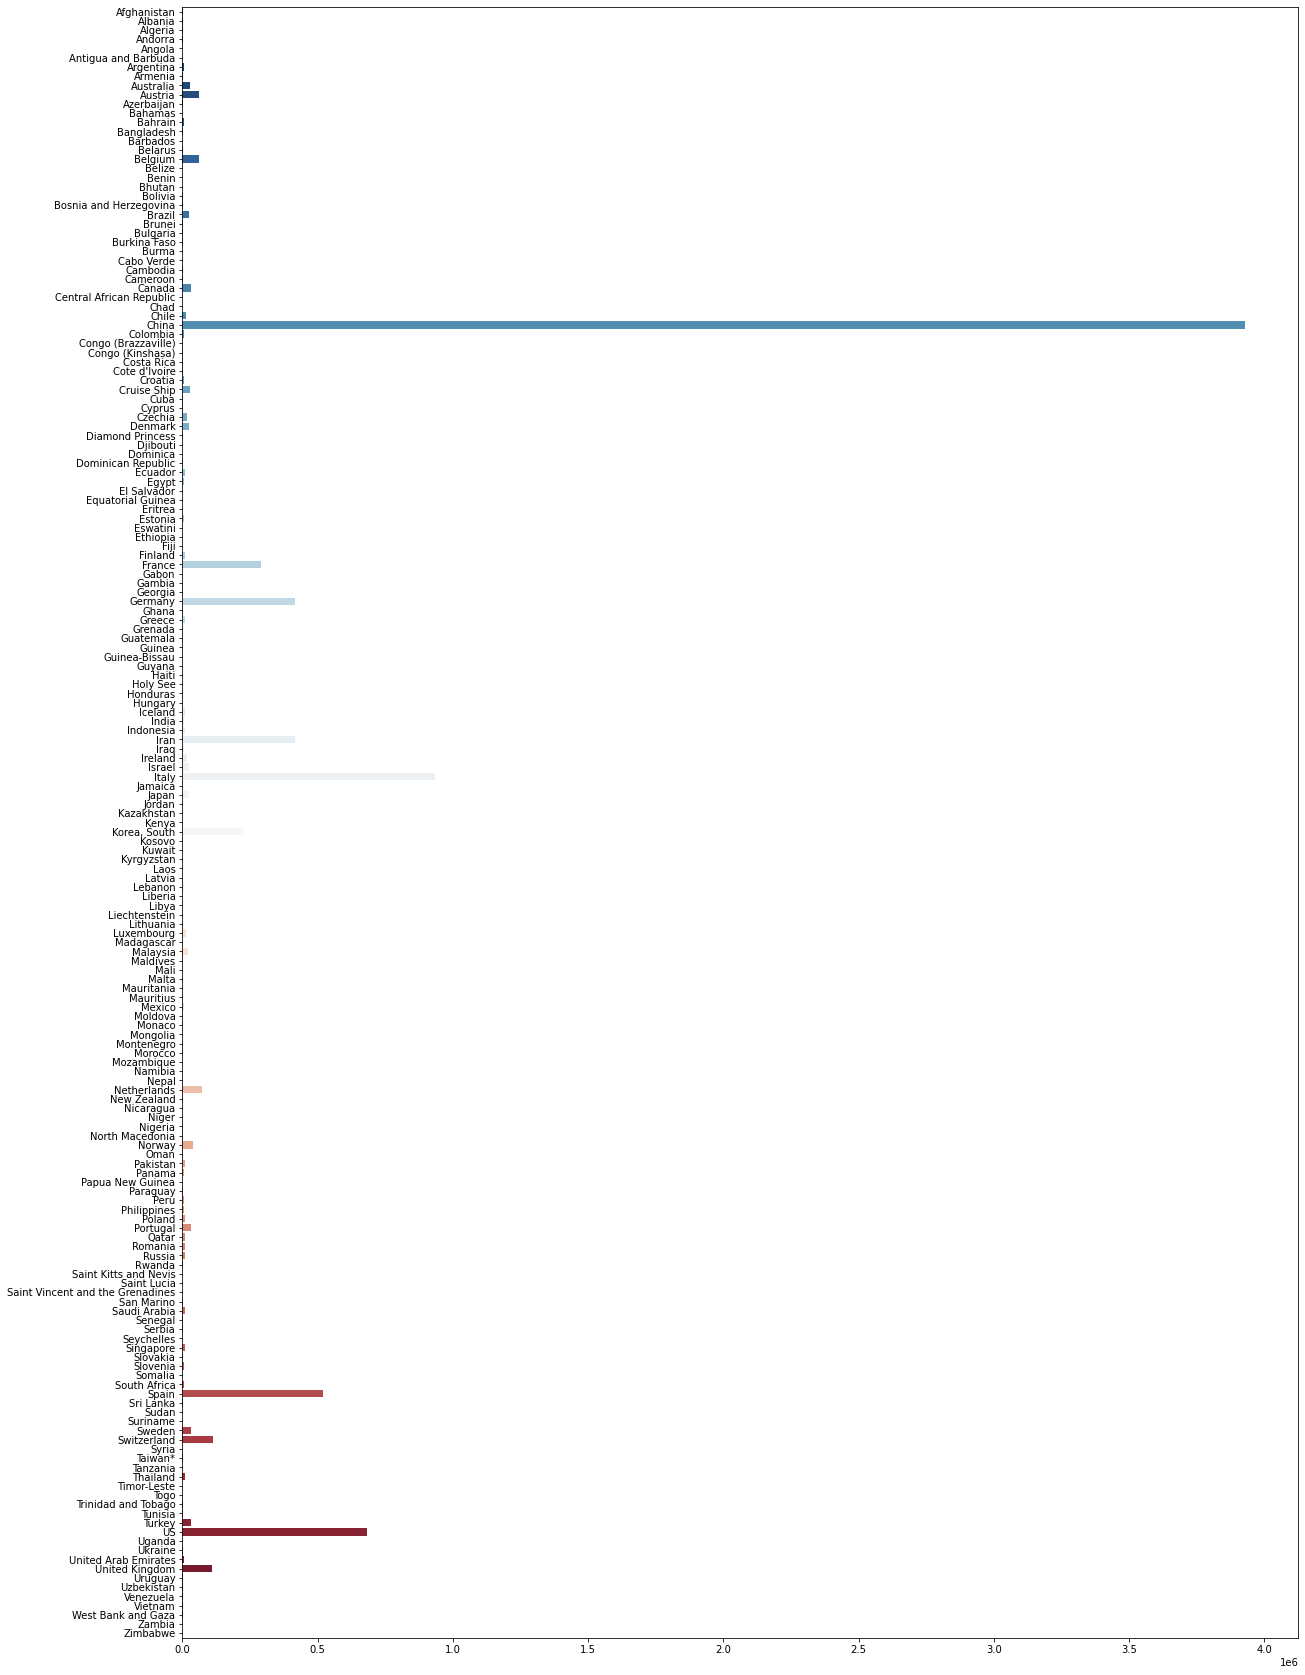

In [30]:
f, ax = plt.subplots(figsize=(20, 30))
names = list(cr[cr.confirmed >0].country_region)
values = list(cr[cr.confirmed >0].confirmed)
sns.barplot(x=values, y=names, palette="RdBu_r")

**<font color='DarkBlue'> Plot the number of recovered cases by country between the dates 1/22/20 and 3/29/20.</font>**

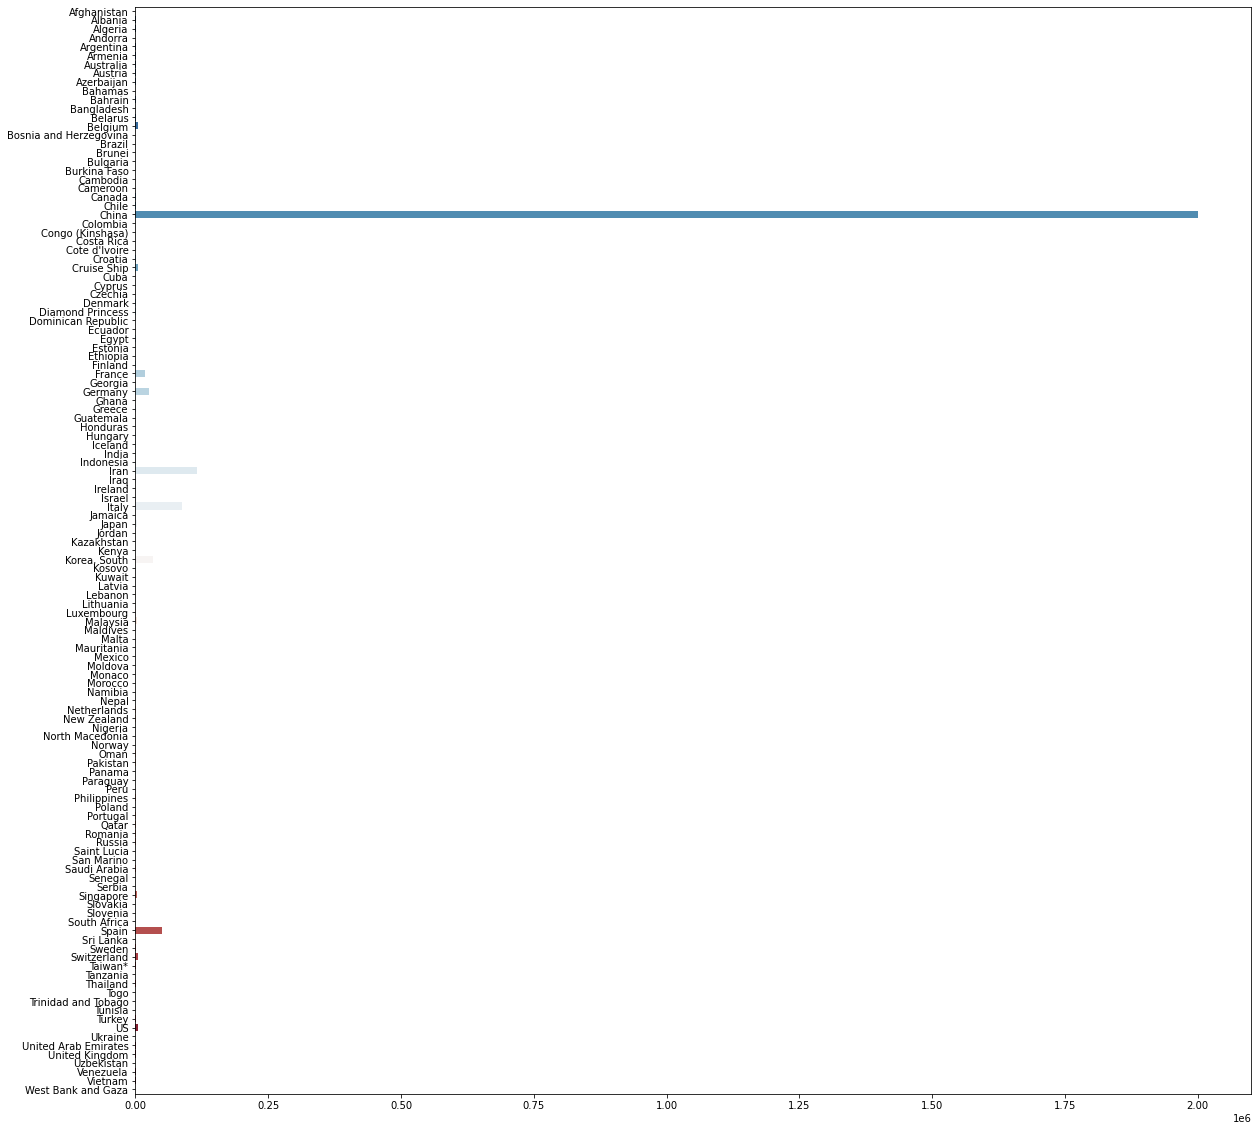

In [31]:
f, ax = plt.subplots(figsize=(20, 20))
names = list(cr[cr.recovered >0].country_region)
values = list(cr[cr.recovered >0].recovered)
sns.barplot(x=values, y=names, palette="RdBu_r")

**<font color='DarkBlue'> Plot the number of deaths by country between the dates 1/22/20 and 3/29/20.</font>**

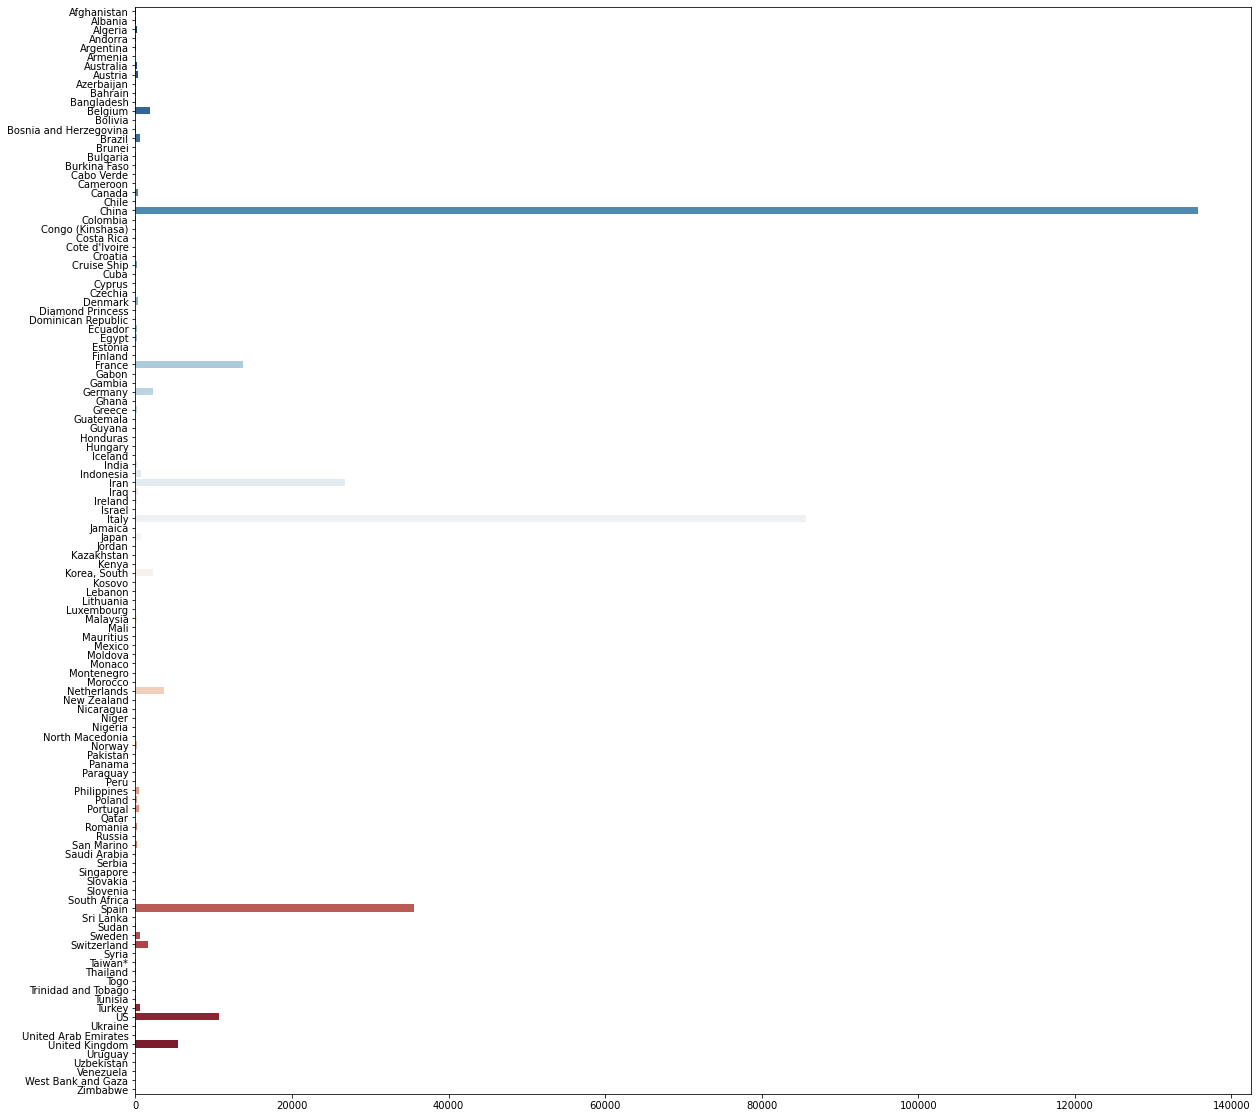

In [32]:
f, ax = plt.subplots(figsize=(20, 20))
names = list(cr[cr.deaths >0].country_region)
values = list(cr[cr.deaths >0].deaths)
sns.barplot(x=values, y=names, palette="RdBu_r")

# Anamolies & Outliers 
Another foundational issue in data cleaning is how to handle outliers. According to [Wikipedia](https://en.wikipedia.org/wiki/Outlier):

> An outlier is an observation point that is distant from other observations.

Understanding what being "distant from other observations" means is easy if we think in a two-dimensional space. For example, if we had a dataset of the net worth of the 7 billion people on earth, then the net worth of the richest 1,000 people would be visible outliers as they are way higher than the rest.

In general, we get outliers in the data in 2 ways: 

1. An error in the data collection process may create outliers. Take, for example, a "Salary" column in an Excel workbook where the values are stored in thousands. If we mistakenly type 100,000 instead of 100, we created an outlier due to error. That is more broadly called "measurement error."
2. Sometimes, the processes that generate the data produce extreme and rare values which can be regarded as true outliers. In this case, the abnormal data is not due to measurement error but to the extreme nature of the observation itself. These cases should be rare.

### Outlier Handling
There are two main steps of outlier handling: 

1. Identify the outliers using visual or statistical techniques.
2. Treat the outliers by dropping them or transforming them to something reasonable and unlikely to cause havoc in our analysis.

Using a boxplot we can visualize the outliers..


**<font color='DarkBlue'> Print boxplot for every numeric column except the timestamp</font>**

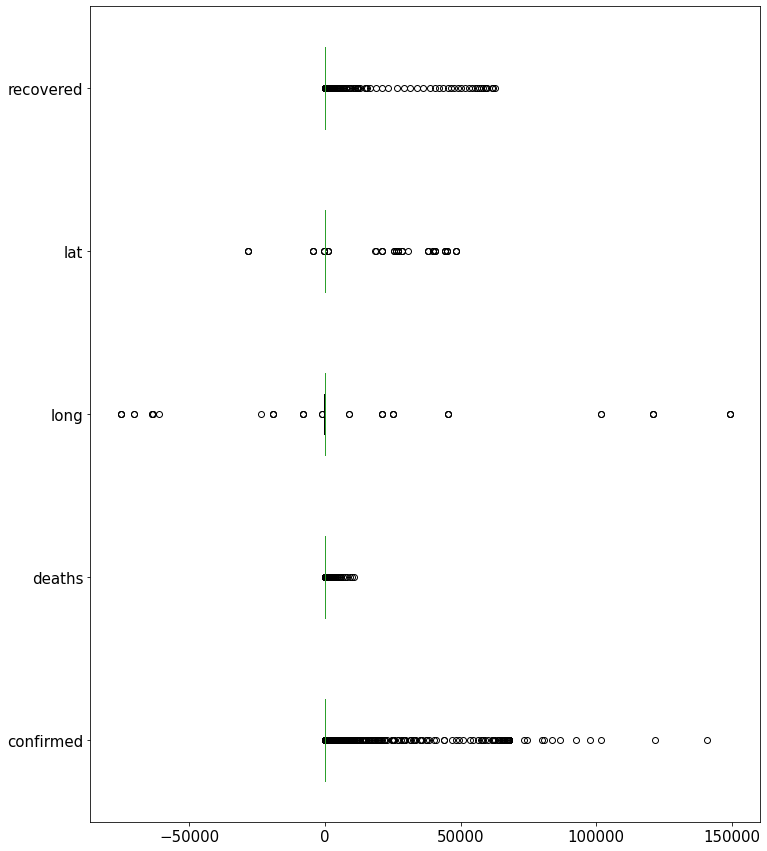

In [33]:
boxplot = df.drop(['timestamp'], axis =1).boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 
![](https://raw.github.com/AVJdataminer/COVID19_GC/master/Assets/AnnotatedBoxplot.png)

**<font color='DarkBlue'>**
Follow these steps:  

1. Create boxplots - earlier step
2. Print shape of data frame before outlier removal
2. Apply outlier removal using the 1.5 times the interquartile range as a cut off value
3. Review how many observations were removed </font>

In [47]:
print('The current size of the data frame is '  + str(df.shape[0])+ ' rows and ' + str(df.shape[1])+' columns.')

The current size of the data frame is 15825 rows and 9 columns.


Calculate the IQR.

In [0]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

**<font color='DarkBlue'>Using the Tilde (~) select for removal from the dataframe those observations that are less than Q1 minus 1.5 times IQR and greater than 1.5 times plus the IQR.**</font>

In [0]:
dfno = df.drop(['timestamp'],axis =1)[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

**<font color='DarkBlue'>Print the size of outliers removed data frame.**</font>

In [53]:
print('The updated size of the data frame is '  + str(dfno.shape[0])+ ' rows and ' + str(dfno.shape[1])+' columns.')

The updated size of the data frame is 11575 rows and 9 columns.


Confirm that the outlier removal didn't reduce the number of columns in the dataframe and take note of how many observations were lost.

**<font color='DarkBlue'>Replot the boxplots, again excluding the timestamp**</font>

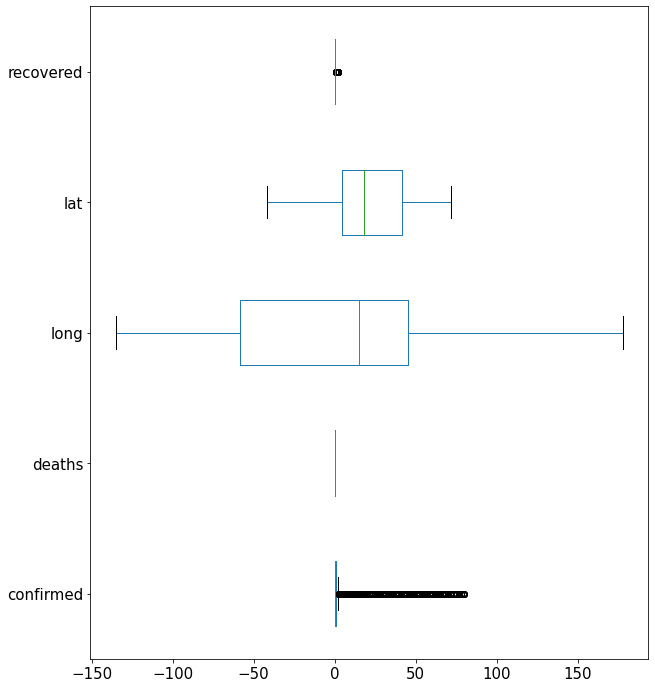

In [94]:
boxplot = dfno.drop(['timestamp'], axis =1).boxplot(grid=False, vert=False,fontsize=15, figsize=(10,12))


 **<font color='DarkBlue'> Create correlation heatmap for continuous features.</font>**

In [54]:
corr = df.corr()
corr.round(2).style.background_gradient(cmap='coolwarm')

,confirmed,deaths,timestamp,long,lat,recovered
confirmed,1.000000,0.860000,0.110000,0.000000,0.100000,0.700000
deaths,0.860000,1.000000,0.090000,-0.000000,0.030000,0.600000
timestamp,0.110000,0.090000,1.000000,0.020000,0.070000,0.060000
long,0.000000,-0.000000,0.020000,1.000000,0.060000,0.000000
lat,0.100000,0.030000,0.070000,0.060000,1.000000,0.000000
recovered,0.700000,0.600000,0.060000,0.000000,0.000000,1.000000


When reviewing the Pearson correlation coefficient heat map you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

 **<font color='DarkBlue'> Create any other figures you think would interesting to learn more about the data..</font>**

# Feature Engineering

In order to do the most with the few features we have we can develop some additional variables by transforming them in different ways. This is especially a good idea when working with timeseries data that is autocorrelated, which means the current values have some dependence on past values.

First we add some new time dimensions.



In [0]:
def time_stamp(df):
    df['date'] = pd.to_datetime(df['timestamp.date'])
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.dayofweek
    df['doy'] = df['date'].dt.dayofyear
time_stamp(df)

Now, let's create some features. Calculate the percent changes in the three dimensions of 'confirmed','recovered',and 'deaths' from 1 to 30 days out. Make sure to group the rows by country_region and sort by the day of year so the percent changes are calculated correctly.

In [0]:
for i in range(1,30):
  df['confirmed_'+str(i)+'_day_pct_change'] = df.sort_values('doy').groupby('country_region')['confirmed'].pct_change(periods=i,fill_method='ffill')
  df['recovered_'+str(i)+'_day_pct_change'] = df.sort_values('doy').groupby('country_region')['recovered'].pct_change(periods=i,fill_method='ffill')
  df['deaths_'+str(i)+'_day_pct_change'] = df.sort_values('doy').groupby('country_region')['deaths'].pct_change(periods=i,fill_method='ffill')

Continuing the EDA process plot the correlation coefficients with all the continuous features including those percent change features associated with the 'confirmed' cases.

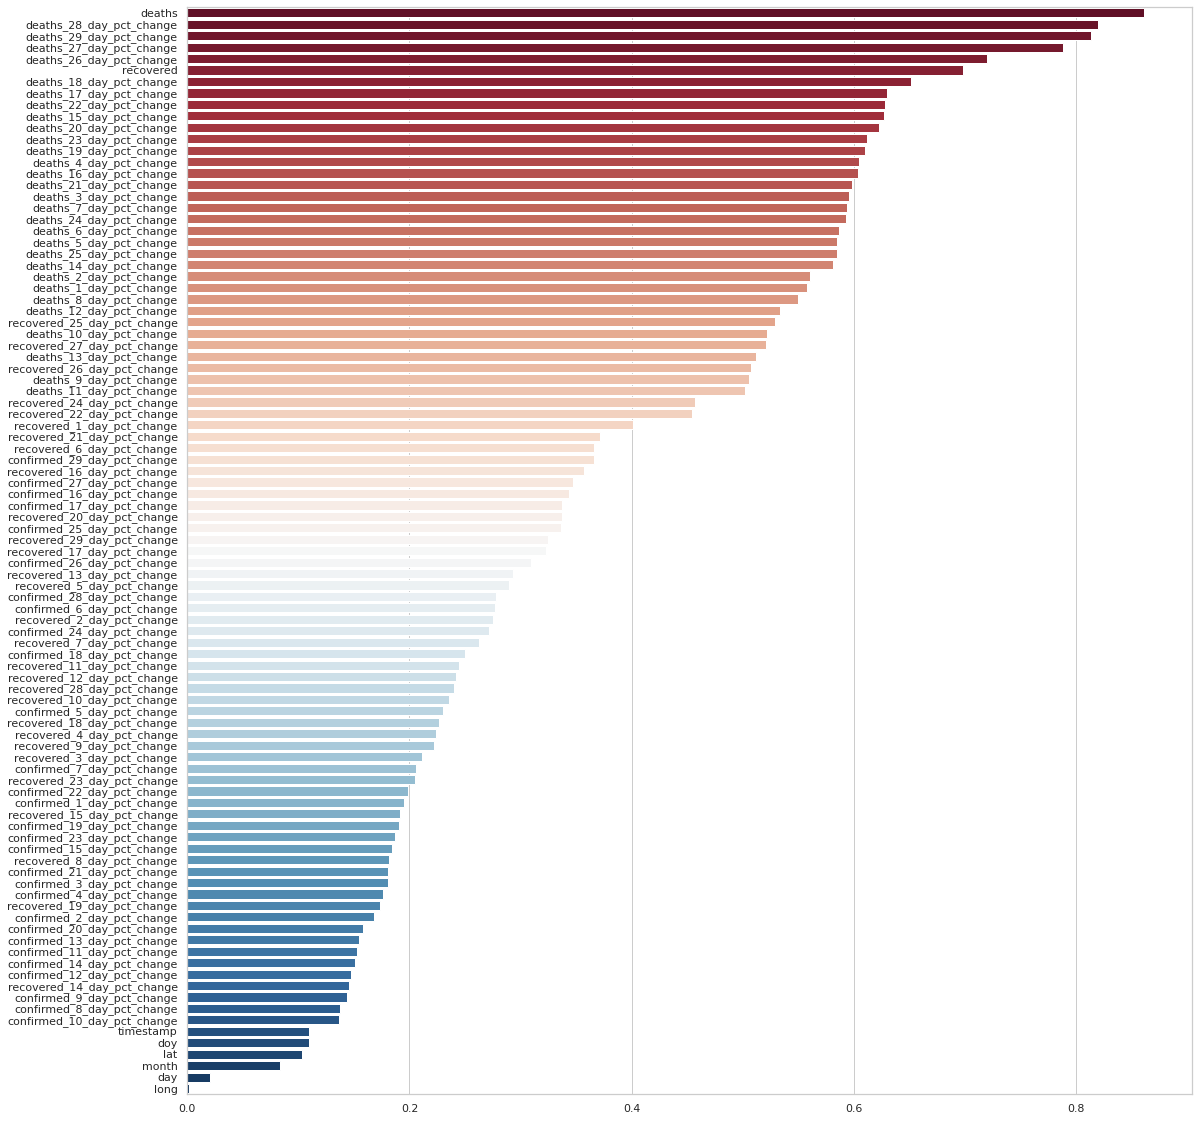

In [145]:
core = df.corr()['confirmed'].abs()
x=pd.DataFrame(core.sort_values(ascending = False))
names = list(x.index)
values = list(x['confirmed'])
del values[0]
del names[0]
# Plot as horizontal bars and review correlation values
f, ax = plt.subplots(figsize=(18, 20))
sns.set(style="whitegrid")
sns.barplot(x=values, y=names, palette= 'RdBu')


Interesting results, we can see that the features 'deaths' and the 29 to 26 day percentage change in deaths are the most highly correlated with confirmed cases.

Keep in mind we are looking at over 150 countries different data here. Let's build a quick model excluding `country_region` and `province_state` and see how it performs.


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15825 entries, 0 to 15824
Data columns (total 100 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   confirmed                    15825 non-null  float64       
 1   deaths                       15825 non-null  float64       
 2   timestamp                    15825 non-null  int64         
 3   province_state               15825 non-null  object        
 4   long                         15825 non-null  float64       
 5   country_region               15825 non-null  object        
 6   timestamp.date               15825 non-null  object        
 7   lat                          15825 non-null  float64       
 8   recovered                    15825 non-null  float64       
 9   date                         15825 non-null  datetime64[ns]
 10  month                        15825 non-null  int64         
 11  day                          15825 non-n

In [0]:
df = df.replace([np.inf, -np.inf], np.nan)

Calculating the percent change columns create a bunch missing values and infinity values. We need to handle these before any modeling can take place.
1. replace the infinity values with na's
2. fill all na's with simple imputer function

In [0]:
from sklearn.impute import SimpleImputer

df = df.replace([np.inf, -np.inf], np.nan)

response ='confirmed'

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = df.drop([response], axis=1)._get_numeric_data()
imputer=imp.fit(X)
X_filled=imputer.transform(X)

Scale normalize the new na filled array and define the response variable as Y.

In [0]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_filled)
X_scaled=scaler.transform(X_filled)

y = df[[response]].values

Split the data into training and testing subsets by date.

In [0]:
from datetime import datetime,timedelta
def dt_splitter(date_col, X, y, test_size):
        xw_date=pd.DataFrame(X).merge(date_col,left_index=True, right_index=True)
        ad = (max(xw_date.date)- min(xw_date.date)).days*test_size
        split_date = min(xw_date.date) + timedelta(days=ad)
        X_train = xw_date.loc[xw_date['date'] <= split_date].drop(['date'], axis=1).values
        X_test = xw_date.loc[xw_date['date'] > split_date].drop(['date'], axis=1).values
        yw_date=pd.DataFrame(y).merge(date_col,left_index=True, right_index=True)
        y_train=yw_date.loc[yw_date['date'] <= split_date].drop(['date'], axis=1).values
        y_test=yw_date.loc[yw_date['date'] > split_date].drop(['date'], axis=1).values
        return X_train, X_test, y_train, y_test

In [0]:
X_train, X_test, y_train, y_test=dt_splitter(df['date'], X_scaled, y, .80)

In [0]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error
from math import sqrt

In [201]:
#Fit the model
from sklearn.metrics import explained_variance_score
lassoreg = Lasso(alpha=1,normalize=True, max_iter=1e5)
lassoreg.fit(X_train,y_train)
y_pred = lassoreg.predict(X_test)
print('Mean explained variance score for confirmed cases for the testing period =%.3f' % explained_variance_score(y_test, y_pred))

Mean explained variance score for confirmed cases for the testing period =0.460


Yikes! Create a scatter plot of the y-test and y-predicted to visualize the model.

Text(0, 0.5, 'Actual')

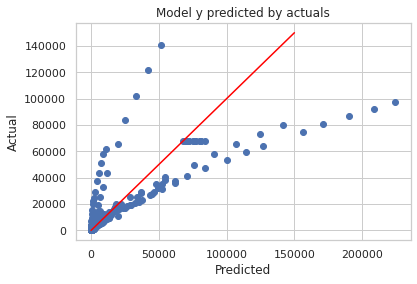

In [210]:
plt.scatter(y_pred,y_test)
plt.plot([x for x in range(0,150000)],[x for x in range(0,150000)], color='red')
plt.title("Model y predicted by actuals")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Unexplained variance is leading to predicted values all over the place and a horrible model. Given this result we have confirmed we need to treat each country as a seperate model.

 **<font color='DarkBlue'> Subset the dataframe to the United States data for our modeling work going forward.</font>**

In [0]:
US = df[df['country_region']=='US']

In [213]:
US.shape

(67, 100)

 **<font color='DarkBlue'> Save the updated dataset as step3_output in your data folder.</font>**

In [0]:
US.to_csv('data/step3_output.csv',index=False)